This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present.

In [2]:
# spark imports
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *

In [3]:
# standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#following are the column contents for the datasets.
content_cols = '''
ID - Unique identifier for the record.
Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
Date - Date when the incident occurred. this is sometimes a best estimate.
Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.
IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.
Primary Type - The primary description of the IUCR code.
Description - The secondary description of the IUCR code, a subcategory of the primary description.
Location Description - Description of the location where the incident occurred.
Arrest - Indicates whether an arrest was made.
Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.
District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.
Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.
Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.
FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.
X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.
Year - Year the incident occurred.
Updated On - Date and time the record was last updated.
Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.'''

In [5]:
def entry_dic(line):
    """
    Convert a header - description line into a single dictionary that holds the original header as 'title', a corresponding field name as 'header', and a description.
    """
    pair = line.split(' - ')
    return {'title': pair[0], 'description': pair[1], 'header': pair[0].lower().replace(' ', '_')}

In [6]:
header_dics = list(map(entry_dic, list(filter(lambda l: l != '', content_cols.split('\n')))))


In [7]:
header_dics[:2]


Out[ 118 ]: 
[{'description': 'Unique identifier for the record.',
 'header': 'id',
 'title': 'ID'},
 {'description': 'The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.',
 'header': 'case_number',
 'title': 'Case Number'}]

In [8]:
crimes = spark.sql("select * from crimes___2001_to_present_9be1b_csv")
#display(crimes.select("*"))

In [9]:
#displaying only first 10 rows using LIMIT
display(sqlContext.sql("select * from crimes___2001_to_present_9be1b_csv LIMIT 10"))

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,false,false,1111,011,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891398861,-87.744384567,"(41.891398861, -87.744384567)"
10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,true,false,0725,007,15,67,26,1166468,1860715,2015,02/10/2018 03:50:01 PM,41.773371528,-87.665319468,"(41.773371528, -87.665319468)"
10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0222,002,4,39,08B,1185075,1875622,2015,02/10/2018 03:50:01 PM,41.81386068,-87.596642837,"(41.81386068, -87.596642837)"
10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,false,false,0225,002,3,40,08B,1178033,1870804,2015,02/10/2018 03:50:01 PM,41.800802415,-87.622619343,"(41.800802415, -87.622619343)"
10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,false,false,1113,011,28,25,03,1144920,1898709,2015,02/10/2018 03:50:01 PM,41.878064761,-87.743354013,"(41.878064761, -87.743354013)"
10000098,HY190032,03/18/2015 10:00:00 PM,049XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,false,false,0223,002,4,39,08B,1183018,1872537,2015,02/10/2018 03:50:01 PM,41.805443345,-87.604283976,"(41.805443345, -87.604283976)"
10000099,HY190047,03/18/2015 11:00:00 PM,070XX S MORGAN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0733,007,17,68,08B,1170859,1858210,2015,02/10/2018 03:50:01 PM,41.766402779,-87.649296123,"(41.766402779, -87.649296123)"
10000100,HY189988,03/18/2015 09:35:00 PM,042XX S PRAIRIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0213,002,3,38,08B,1178746,1876914,2015,02/10/2018 03:50:01 PM,41.817552577,-87.619818523,"(41.817552577, -87.619818523)"
10000101,HY190020,03/18/2015 10:09:00 PM,036XX S WOLCOTT AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,true,false,0912,009,11,59,18,1164279,1880656,2015,02/10/2018 03:50:01 PM,41.828138428,-87.672782106,"(41.828138428, -87.672782106)"
10000104,HY189964,03/18/2015 09:25:00 PM,097XX S PRAIRIE AVE,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,false,false,0511,005,6,49,08B,1179637,1840444,2015,02/10/2018 03:50:01 PM,41.71745472,-87.617663257,"(41.71745472, -87.617663257)"


In [10]:
crimes.printSchema()

root
-- ID: string (nullable = true)
-- Case Number: string (nullable = true)
-- Date: string (nullable = true)
-- Block: string (nullable = true)
-- IUCR: string (nullable = true)
-- Primary Type: string (nullable = true)
-- Description: string (nullable = true)
-- Location Description: string (nullable = true)
-- Arrest: string (nullable = true)
-- Domestic: string (nullable = true)
-- Beat: string (nullable = true)
-- District: string (nullable = true)
-- Ward: string (nullable = true)
-- Community Area: string (nullable = true)
-- FBI Code: string (nullable = true)
-- X Coordinate: string (nullable = true)
-- Y Coordinate: string (nullable = true)
-- Year: string (nullable = true)
-- Updated On: string (nullable = true)
-- Latitude: string (nullable = true)
-- Longitude: string (nullable = true)
-- Location: string (nullable = true)

In [11]:
for h in header_dics:
    crimes = crimes.withColumnRenamed(h['title'], h['header'])

In [12]:
#There's a row that's been identified as having no value for location_description. We will just get rid of it right now...
#Initially implemented using a rdd.filter call. Although, alternatively, one can use the Dataset.filter function
crimes = crimes.rdd.filter(lambda rec: rec.arrest.find('Location Description') < 0).toDF().cache()



In [13]:
#initial data
crimes.show(n=3, truncate=False)


+--------+-----------+----------------------+----------------------+----+-------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
id |case_number|date |block |iucr|primary_type |description |location_description|arrest|domestic|beat|district|ward|community_area|fbi_code|x_coordinate|y_coordinate|year|updated_on |latitude |longitude |location |
+--------+-----------+----------------------+----------------------+----+-------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
10000092|HY189866 |03/18/2015 07:44:00 PM|047XX W OHIO ST |041A|BATTERY |AGGRAVATED: HANDGUN |STREET |false |false |1111|011 |28 |25 |04B |1144606 |1903566 |2015|02/10/2018 03:50:01 PM|41.891398861|-87.744384567|(41.891398861, -87.744384567)|
10000094|HY190059 |03/18/2015 11:00:00 PM|066XX S MARSHFIELD AVE|4625|OTHER OFFENSE|PAROLE VIOLATION |STREET |true |false |0725|007 |15 |67 |26 |1166468 |1860715 |2015|02/10/2018 03:50:01 PM|41.773371528|-87.665319468|(41.773371528, -87.665319468)|
10000095|HY190052 |03/18/2015 10:45:00 PM|044XX S LAKE PARK AVE |0486|BATTERY |DOMESTIC BATTERY SIMPLE|APARTMENT |false |true |0222|002 |4 |39 |08B |1185075 |1875622 |2015|02/10/2018 03:50:01 PM|41.81386068 |-87.596642837|(41.81386068, -87.596642837) |
+--------+-----------+----------------------+----------------------+----+-------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
only showing top 3 rows

In [14]:
# counts of crime types
crime_type_groups = crimes.groupBy('primary_type').count()

In [15]:
crime_type_counts = crime_type_groups.orderBy('count', ascending=False)

In [16]:
#print(crimes.count())
print(" The crimes dataframe has {} records".format(crimes.count()))

The crimes dataframe has 6652608 records

In [17]:
crimes.columns

Out[ 140 ]: 
['id',
 'case_number',
 'date',
 'block',
 'iucr',
 'primary_type',
 'description',
 'location_description',
 'arrest',
 'domestic',
 'beat',
 'district',
 'ward',
 'community_area',
 'fbi_code',
 'x_coordinate',
 'y_coordinate',
 'year',
 'updated_on',
 'latitude',
 'longitude',
 'location']

In [18]:
#Let's see the schema of the data frame:
crimes.printSchema()

root
-- id: string (nullable = true)
-- case_number: string (nullable = true)
-- date: string (nullable = true)
-- block: string (nullable = true)
-- iucr: string (nullable = true)
-- primary_type: string (nullable = true)
-- description: string (nullable = true)
-- location_description: string (nullable = true)
-- arrest: string (nullable = true)
-- domestic: string (nullable = true)
-- beat: string (nullable = true)
-- district: string (nullable = true)
-- ward: string (nullable = true)
-- community_area: string (nullable = true)
-- fbi_code: string (nullable = true)
-- x_coordinate: string (nullable = true)
-- y_coordinate: string (nullable = true)
-- year: string (nullable = true)
-- updated_on: string (nullable = true)
-- latitude: string (nullable = true)
-- longitude: string (nullable = true)
-- location: string (nullable = true)

In [19]:
#Top most frquent crimes types
crime_type_counts.show(truncate=False)
print("The top most frequent crime is Theft with 1394371 counts")

+--------------------------------+-------+
primary_type |count |
+--------------------------------+-------+
THEFT |1394371|
BATTERY |1214761|
CRIMINAL DAMAGE |761704 |
NARCOTICS |706286 |
OTHER OFFENSE |412797 |
ASSAULT |411405 |
BURGLARY |383734 |
MOTOR VEHICLE THEFT |310791 |
DECEPTIVE PRACTICE |255487 |
ROBBERY |252284 |
CRIMINAL TRESPASS |191049 |
WEAPONS VIOLATION |68712 |
PROSTITUTION |68058 |
PUBLIC PEACE VIOLATION |47327 |
OFFENSE INVOLVING CHILDREN |44523 |
CRIM SEXUAL ASSAULT |26427 |
SEX OFFENSE |24608 |
INTERFERENCE WITH PUBLIC OFFICER|14694 |
GAMBLING |14327 |
LIQUOR LAW VIOLATION |13960 |
+--------------------------------+-------+
only showing top 20 rows

The top most frequent crime is Theft with 1394371 counts

In [20]:
#obtain a Pandas data frame 
counts_pddf = pd.DataFrame(crime_type_counts.rdd.map(lambda l: l.asDict()).collect())

In [21]:
counts_pddf.head(10)


Out[ 144 ]: 
 count primary_type
0 1394371 THEFT
1 1214761 BATTERY
2 761704 CRIMINAL DAMAGE
3 706286 NARCOTICS
4 412797 OTHER OFFENSE
5 411405 ASSAULT
6 383734 BURGLARY
7 310791 MOTOR VEHICLE THEFT
8 255487 DECEPTIVE PRACTICE
9 252284 ROBBERY

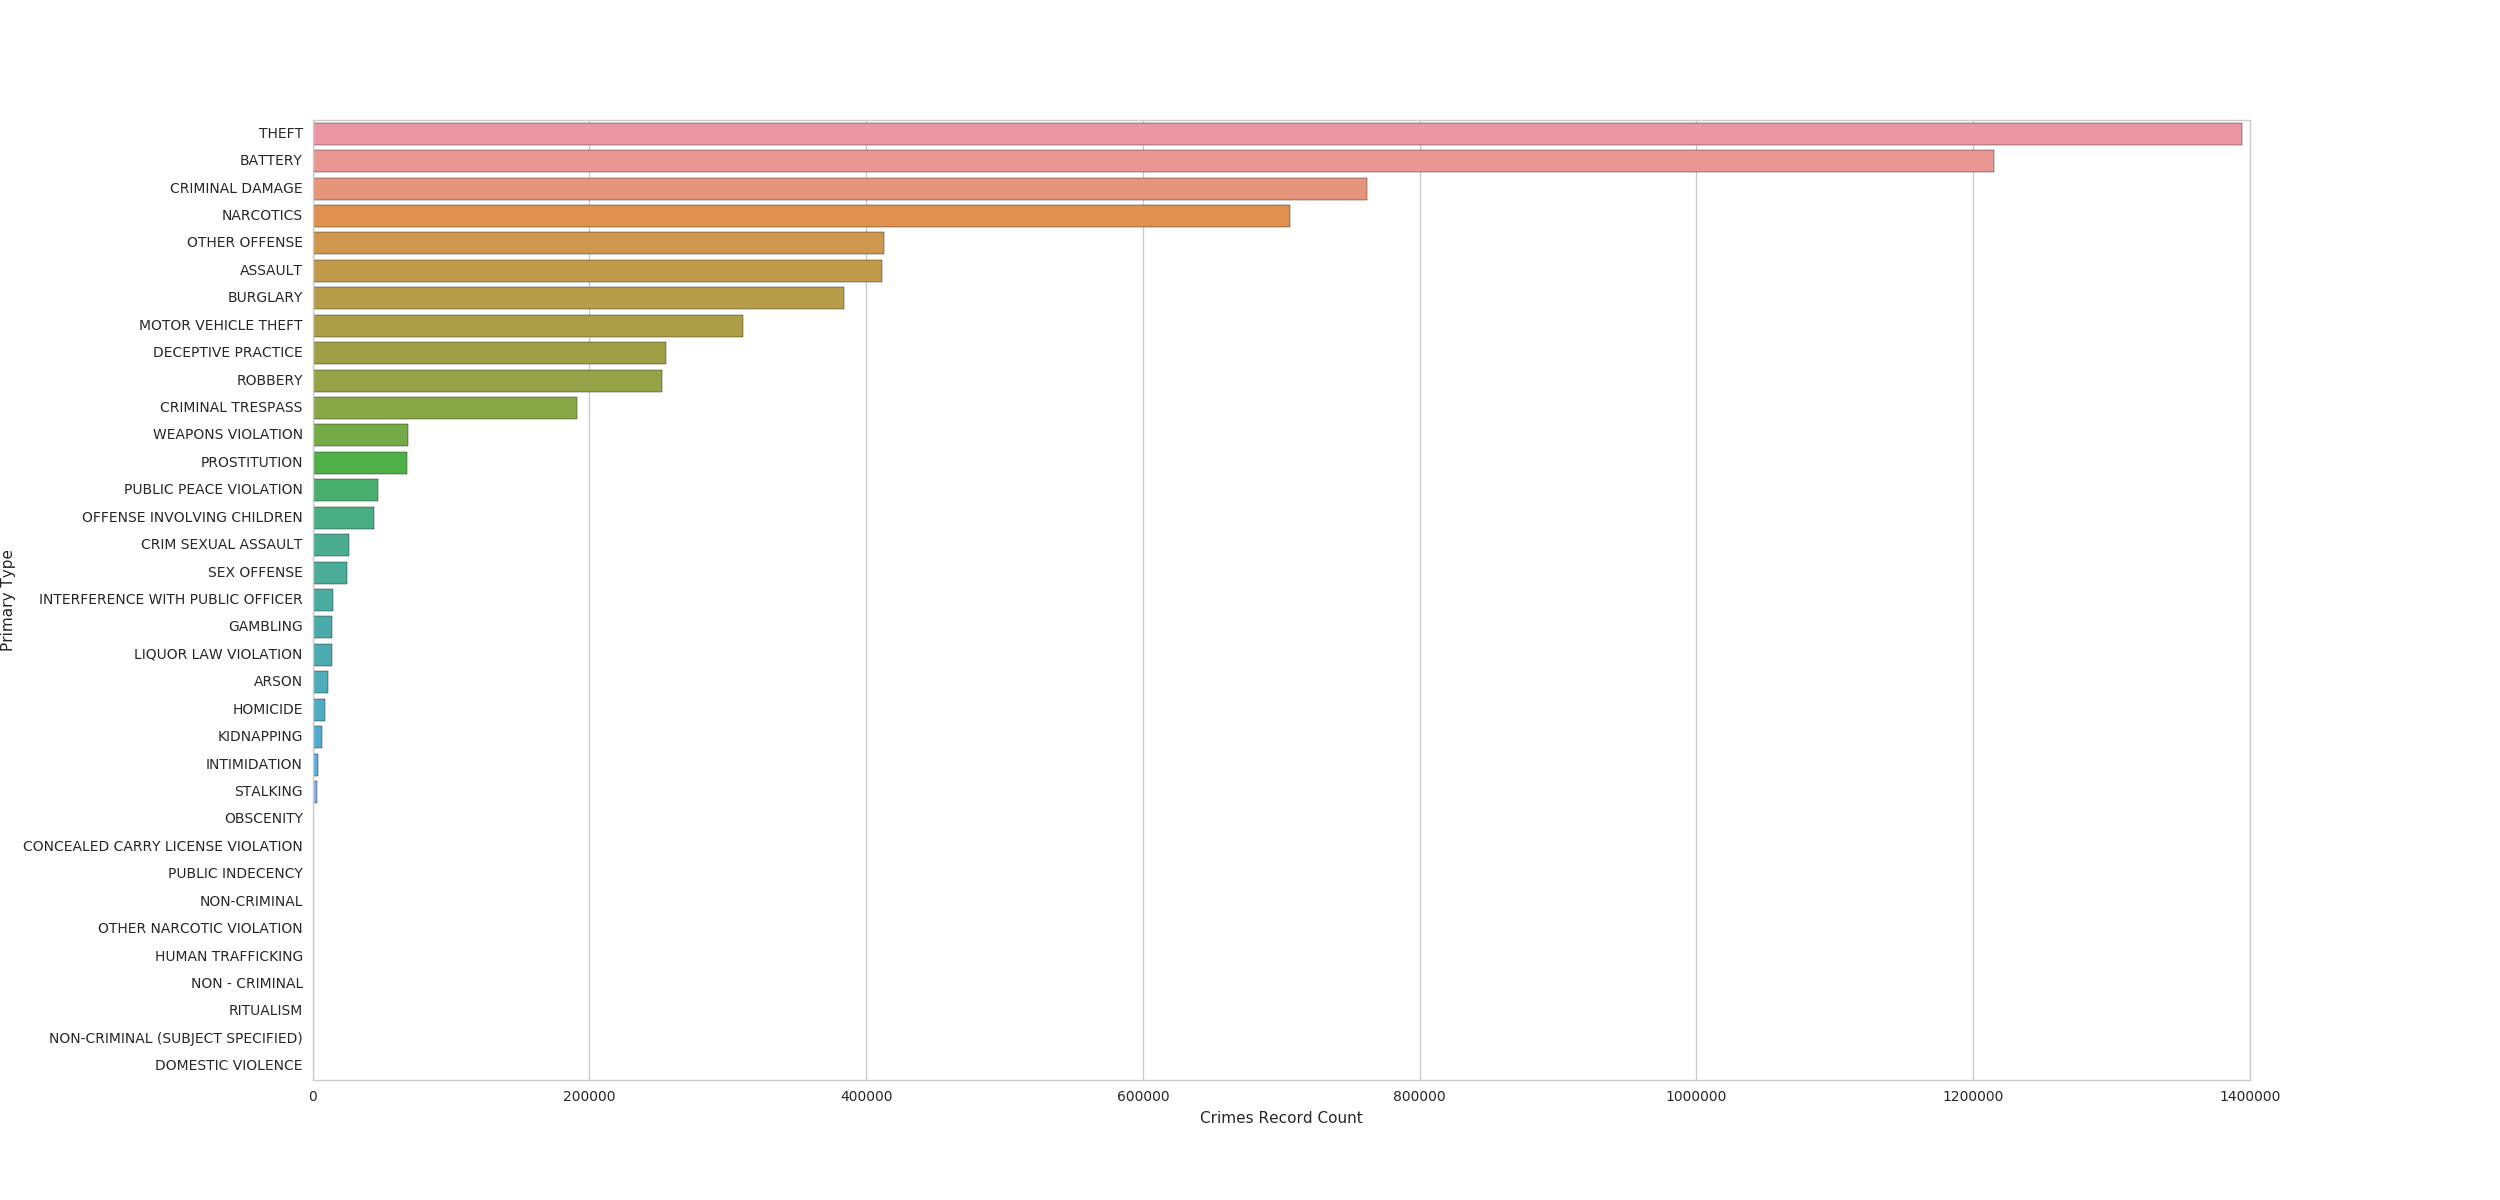

In [22]:
plt.clf()
#plt.rcParams["figure.figsize"] = [25,8]
plt.figure(figsize = (25,12))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='count', y='primary_type', data=counts_pddf)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")
display()

In [23]:
import datetime
from pyspark.sql.functions import *

In [24]:
crimes.select(min('date').alias('first_record_date'), max('date').alias('latest_record_date')).show(truncate=False)


+----------------------+----------------------+
first_record_date |latest_record_date |
+----------------------+----------------------+
01/01/2001 01:00:00 AM|12/31/2017 12:55:00 PM|
+----------------------+----------------------+

So its clear that the dataset we're dealing with comprises records from 01/01/2001 to 12/31/2017
Converting dates to a timestamp type. As seen in the schema output above, the date field is of string type, which won't be very helpful
The format specifier that seems valid for date like '02/23/2006 09:06:22 PM' is 'MM/dd/yyyy hh:mm:ss a

In [26]:
crimes = crimes.withColumn('date_time', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'YYYY')) #adding a month column to be able to view stats on a monthly basis

In [27]:
crimes.select(['date','date_time', 'month'])\
  .show(n=2, truncate=False)

+----------------------+-------------------+----------+
date |date_time |month |
+----------------------+-------------------+----------+
03/18/2015 07:44:00 PM|2015-03-18 19:44:00|2015-01-01|
03/18/2015 11:00:00 PM|2015-03-18 23:00:00|2015-01-01|
+----------------------+-------------------+----------+
only showing top 2 rows

In [28]:
# crime types and arrest over years:
type_arrest_date = crimes.groupBy(['arrest', 'month'])\
                     .count()\
                     .orderBy(['month', 'count'], ascending=[True, False])
print()
type_arrest_date.show(3, truncate=False)

()
+------+----------+------+
arrest|month |count |
+------+----------+------+
false |2001-01-01|343842|
true |2001-01-01|141901|
false |2002-01-01|345205|
+------+----------+------+
only showing top 3 rows

In [29]:
# A small detour to learn/see how datetime works
import datetime

In [30]:
datetime.datetime.now()
datetime.datetime.strftime(datetime.datetime.now(), '%H')

Out[ 153 ]: '00'

In [31]:
#A pandas data frame of the collected dictionary version of the date-grouped DF above
type_arrest_pddf = pd.DataFrame(type_arrest_date.rdd.map(lambda l: l.asDict()).collect())
type_arrest_pddf

Out[ 154 ]: 
 arrest count month
0 false 343842 2001-01-01
1 true 141901 2001-01-01
2 false 345205 2002-01-01
3 true 141545 2002-01-01
4 false 334362 2003-01-01
5 true 141570 2003-01-01
6 false 324690 2004-01-01
7 true 144684 2004-01-01
8 false 312803 2005-01-01
9 true 140894 2005-01-01
10 false 312708 2006-01-01
11 true 135379 2006-01-01
12 false 305143 2007-01-01
13 true 131843 2007-01-01
14 false 317075 2008-01-01
15 true 109949 2008-01-01
16 false 281890 2009-01-01
17 true 110756 2009-01-01
18 false 269835 2010-01-01
19 true 100436 2010-01-01
20 false 255530 2011-01-01
21 true 96192 2011-01-01
22 false 245319 2012-01-01
23 true 90557 2012-01-01
24 false 220523 2013-01-01
25 true 86444 2013-01-01
26 false 195667 2014-01-01
27 true 79409 2014-01-01
28 false 194012 2015-01-01
29 true 69784 2015-01-01
30 false 215924 2016-01-01
31 true 52704 2016-01-01
32 false 215423 2017-01-01
33 true 52008 2017-01-01
34 false 109878 2018-01-01
35 true 26724 2018-01-01

In [32]:
#Convert date/time values to Pandas type
#A lot of this is unnecessary, but that's called fiddling.
type_arrest_pddf['yearpd'] = type_arrest_pddf['month'].apply(lambda dt: datetime.datetime.strftime(pd.Timestamp(dt), '%Y'))
type_arrest_pddf

Out[ 155 ]: 
 arrest count month yearpd
0 false 343842 2001-01-01 2001
1 true 141901 2001-01-01 2001
2 false 345205 2002-01-01 2002
3 true 141545 2002-01-01 2002
4 false 334362 2003-01-01 2003
5 true 141570 2003-01-01 2003
6 false 324690 2004-01-01 2004
7 true 144684 2004-01-01 2004
8 false 312803 2005-01-01 2005
9 true 140894 2005-01-01 2005
10 false 312708 2006-01-01 2006
11 true 135379 2006-01-01 2006
12 false 305143 2007-01-01 2007
13 true 131843 2007-01-01 2007
14 false 317075 2008-01-01 2008
15 true 109949 2008-01-01 2008
16 false 281890 2009-01-01 2009
17 true 110756 2009-01-01 2009
18 false 269835 2010-01-01 2010
19 true 100436 2010-01-01 2010
20 false 255530 2011-01-01 2011
21 true 96192 2011-01-01 2011
22 false 245319 2012-01-01 2012
23 true 90557 2012-01-01 2012
24 false 220523 2013-01-01 2013
25 true 86444 2013-01-01 2013
26 false 195667 2014-01-01 2014
27 true 79409 2014-01-01 2014
28 false 194012 2015-01-01 2015
29 true 69784 2015-01-01 2015
30 false 215924 2016-01-01 2016
31 true 52704 2016-01-01 2016
32 false 215423 2017-01-01 2017
33 true 52008 2017-01-01 2017
34 false 109878 2018-01-01 2018
35 true 26724 2018-01-01 2018

In [33]:
type_arrest_pddf['arrest'] = type_arrest_pddf['arrest']#.apply(lambda l: l=='False')
type_arrest_pddf.head(50)

Out[ 156 ]: 
 arrest count month yearpd
0 false 343842 2001-01-01 2001
1 true 141901 2001-01-01 2001
2 false 345205 2002-01-01 2002
3 true 141545 2002-01-01 2002
4 false 334362 2003-01-01 2003
5 true 141570 2003-01-01 2003
6 false 324690 2004-01-01 2004
7 true 144684 2004-01-01 2004
8 false 312803 2005-01-01 2005
9 true 140894 2005-01-01 2005
10 false 312708 2006-01-01 2006
11 true 135379 2006-01-01 2006
12 false 305143 2007-01-01 2007
13 true 131843 2007-01-01 2007
14 false 317075 2008-01-01 2008
15 true 109949 2008-01-01 2008
16 false 281890 2009-01-01 2009
17 true 110756 2009-01-01 2009
18 false 269835 2010-01-01 2010
19 true 100436 2010-01-01 2010
20 false 255530 2011-01-01 2011
21 true 96192 2011-01-01 2011
22 false 245319 2012-01-01 2012
23 true 90557 2012-01-01 2012
24 false 220523 2013-01-01 2013
25 true 86444 2013-01-01 2013
26 false 195667 2014-01-01 2014
27 true 79409 2014-01-01 2014
28 false 194012 2015-01-01 2015
29 true 69784 2015-01-01 2015
30 false 215924 2016-01-01 2016
31 true 52704 2016-01-01 2016
32 false 215423 2017-01-01 2017
33 true 52008 2017-01-01 2017
34 false 109878 2018-01-01 2018
35 true 26724 2018-01-01 2018

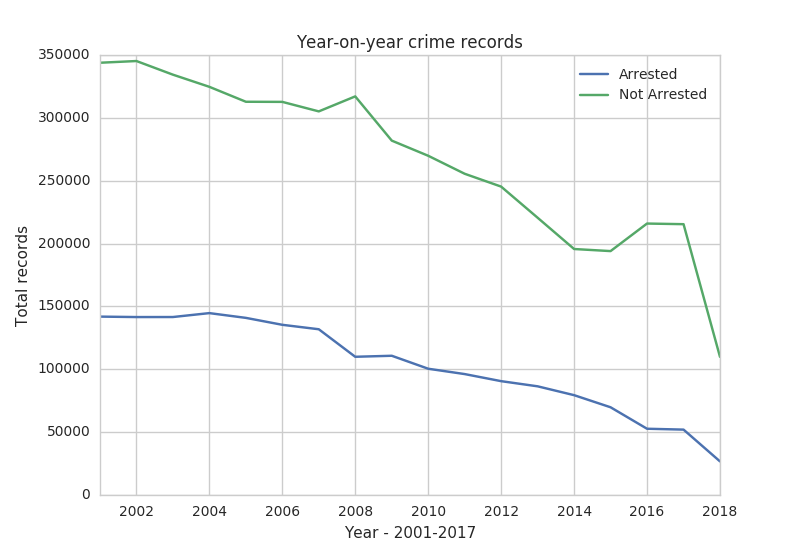

In [34]:
# Data for plotting
t = type_arrest_pddf['count'] #- 20  np.arange(0.0, 2.0, 0.01)
s = type_arrest_pddf['month']

arrested = type_arrest_pddf[type_arrest_pddf['arrest'] == "true"]
not_arrested = type_arrest_pddf[type_arrest_pddf['arrest'] == "false"]

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(arrested['month'], arrested['count'], label='Arrested')
ax.plot(not_arrested['month'], not_arrested['count'], label='Not Arrested')

ax.set(xlabel='Year - 2001-2017', ylabel='Total records',
       title='Year-on-year crime records')
ax.grid(b=True, which='both', axis='y')
ax.legend()
display()


In [35]:
# Extract the "hour" field from the date into a separate column called "hour"
crimes_hour = crimes.withColumn('hour', hour(crimes['date_time']))

In [36]:
# Derive a data frame with crime counts per hour of the day:
hourly_count = crimes_hour.groupBy(['primary_type', 'hour']).count().cache()
hourly_total_count = hourly_count.groupBy('hour').sum('count')

In [37]:
hourly_count_pddf = pd.DataFrame(hourly_total_count.select(hourly_total_count['hour'], hourly_total_count['sum(count)'].alias('count'))\
                                .rdd.map(lambda l: l.asDict())\
                                 .collect())

In [38]:
hourly_count_pddf = hourly_count_pddf.sort_values(by='hour')

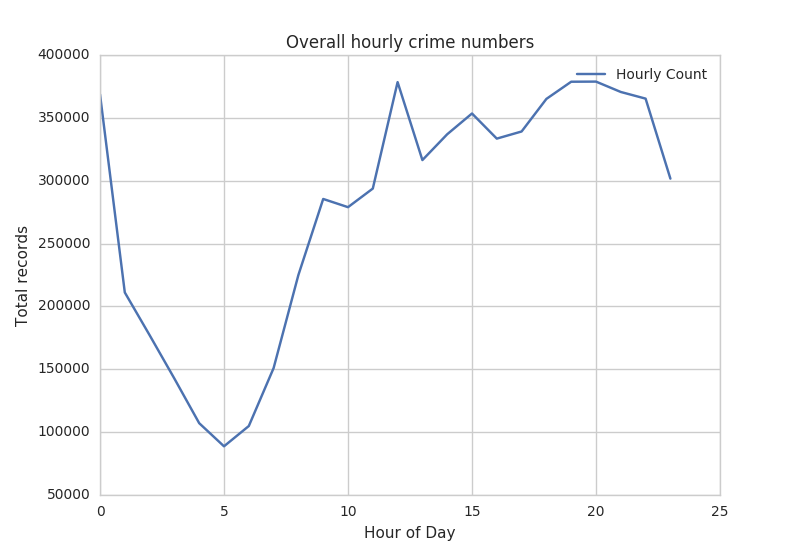

In [39]:
fig, ax = plt.subplots()
ax.plot(hourly_count_pddf['hour'], hourly_count_pddf['count'], label='Hourly Count')

ax.set(xlabel='Hour of Day', ylabel='Total records',
       title='Overall hourly crime numbers')
ax.grid(b=True, which='both', axis='y')
ax.legend()
display()

In [40]:
# Number of types of location recorded in the dataset
crimes.select('location_description').distinct().count()

Out[ 39 ]: 180

In [41]:
crimes.groupBy(['location_description']).count().orderBy('count', ascending=False).show(10)

+--------------------+-------+
location_description| count|
+--------------------+-------+
 STREET|1749370|
 RESIDENCE|1126950|
 APARTMENT| 685713|
 SIDEWALK| 657105|
 OTHER| 252611|
PARKING LOT/GARAG...| 191109|
 ALLEY| 148926|
SCHOOL, PUBLIC, B...| 141360|
 RESIDENCE-GARAGE| 130152|
 SMALL RETAIL STORE| 116787|
+--------------------+-------+
only showing top 10 rows

In [42]:
domestic_hour = pd.DataFrame(crimes_hour.groupBy(['domestic', 'hour']).count().orderBy('hour').rdd.map(lambda row: row.asDict()).collect())

In [43]:
dom = domestic_hour[domestic_hour['domestic'] == 'True']['count']
non_dom = domestic_hour[domestic_hour['domestic'] == 'False']['count']

either_dom = domestic_hour.groupby(by=['hour']).sum()['count']

dom_keys = domestic_hour[domestic_hour['domestic'] == 'False']['hour']
either_dom.shape

Out[ 42 ]: (24,)

In [44]:
crimes_dates = crimes_hour.withColumn('week_day', dayofweek(crimes_hour['date_time']))\
                 .withColumn('year_month', month(crimes_hour['date_time']))\
                 .withColumn('month_day', dayofmonth(crimes_hour['date_time']))\
                 .withColumn('date_number', datediff(crimes['date_time'], to_date(lit('2001-01-01'), format='yyyy-MM-dd')))\
                 .cache()

In [45]:
crimes_dates.select(['date', 'month', 'hour', 'week_day', 'year', 'year_month', 'month_day', 'date_number']).show(20, truncate=False)

+----------------------+----------+----+--------+----+----------+---------+-----------+
date |month |hour|week_day|year|year_month|month_day|date_number|
+----------------------+----------+----+--------+----+----------+---------+-----------+
03/18/2015 07:44:00 PM|2015-01-01|19 |4 |2015|3 |18 |5189 |
03/18/2015 11:00:00 PM|2015-01-01|23 |4 |2015|3 |18 |5189 |
03/18/2015 10:45:00 PM|2015-01-01|22 |4 |2015|3 |18 |5189 |
03/18/2015 10:30:00 PM|2015-01-01|22 |4 |2015|3 |18 |5189 |
03/18/2015 09:00:00 PM|2015-01-01|21 |4 |2015|3 |18 |5189 |
03/18/2015 10:00:00 PM|2015-01-01|22 |4 |2015|3 |18 |5189 |
03/18/2015 11:00:00 PM|2015-01-01|23 |4 |2015|3 |18 |5189 |
03/18/2015 09:35:00 PM|2015-01-01|21 |4 |2015|3 |18 |5189 |
03/18/2015 10:09:00 PM|2015-01-01|22 |4 |2015|3 |18 |5189 |
03/18/2015 09:25:00 PM|2015-01-01|21 |4 |2015|3 |18 |5189 |
03/18/2015 09:30:00 PM|2015-01-01|21 |4 |2015|3 |18 |5189 |
03/15/2015 04:10:00 PM|2015-01-01|16 |1 |2015|3 |15 |5186 |
03/18/2015 09:14:00 PM|2015-01-01|21 |4 |2015|3 |18 |5189 |
03/18/2015 10:50:00 PM|2015-01-01|22 |4 |2015|3 |18 |5189 |
03/18/2015 10:31:00 PM|2015-01-01|22 |4 |2015|3 |18 |5189 |
03/18/2015 12:55:00 PM|2015-01-01|12 |4 |2015|3 |18 |5189 |
03/18/2015 08:00:00 PM|2015-01-01|20 |4 |2015|3 |18 |5189 |
03/18/2015 09:00:00 PM|2015-01-01|21 |4 |2015|3 |18 |5189 |
03/18/2015 10:56:00 PM|2015-01-01|22 |4 |2015|3 |18 |5189 |
03/18/2015 10:45:00 PM|2015-01-01|22 |4 |2015|3 |18 |5189 |
+----------------------+----------+----+--------+----+----------+---------+-----------+
only showing top 20 rows

In [46]:
week_day_crime_counts = crimes_dates.groupBy('week_day').count()

In [47]:
week_day_crime_counts_pddf = pd.DataFrame(week_day_crime_counts.orderBy('week_day').rdd.map(lambda e: e.asDict()).collect())


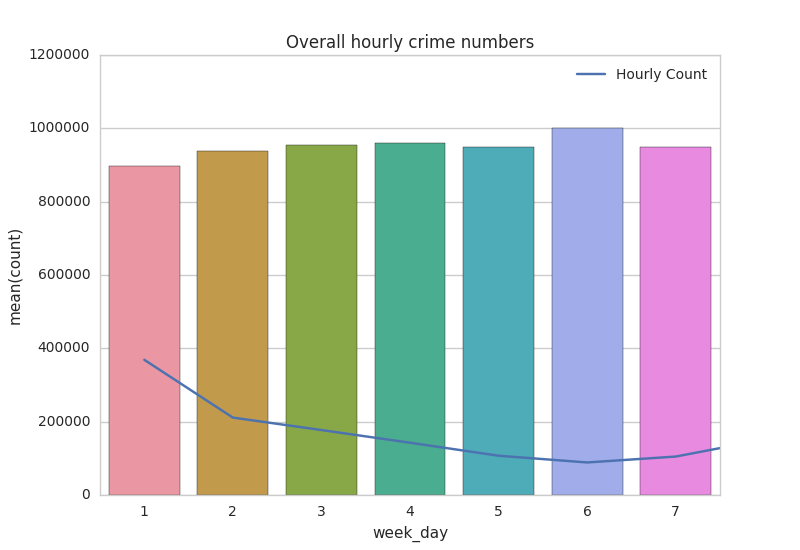

In [48]:
sns.barplot(data = week_day_crime_counts_pddf, x='week_day', y='count')
display()

In [49]:
year_month_crime_counts = crimes_dates.groupBy('year_month').count()

In [50]:
year_month_crime_counts_pddf = pd.DataFrame(year_month_crime_counts.orderBy('year_month').rdd.map(lambda e: e.asDict()).collect())


In [51]:
year_month_crime_counts_pddf

Out[ 177 ]: 
 count year_month
0 528017 1
1 463682 2
2 557170 3
3 558683 4
4 602536 5
5 599396 6
6 615639 7
7 599212 8
8 562584 9
9 570103 10
10 512904 11
11 482682 12

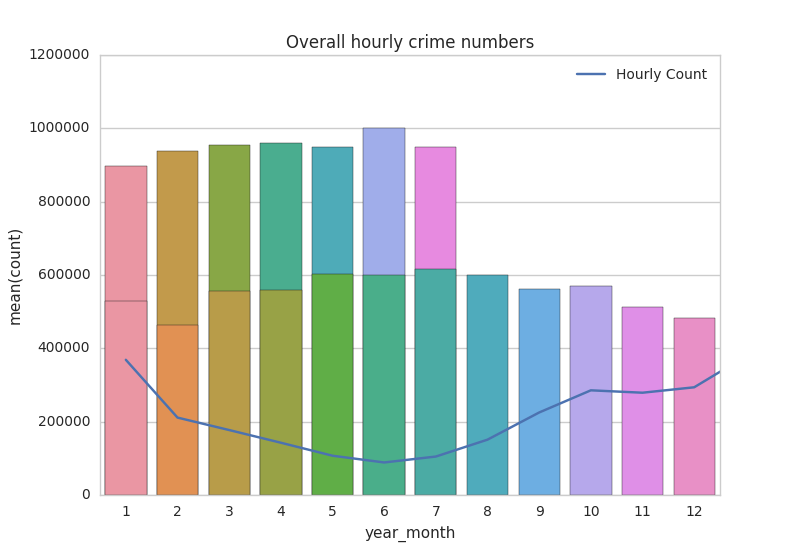

In [52]:
|sns.barplot(data=year_month_crime_counts_pddf, y='count', x='year_month')
display()

In [53]:
month_day_crime_counts = crimes_dates.groupBy('month_day').count()


In [54]:
month_day_crime_counts_pddf = pd.DataFrame(month_day_crime_counts.orderBy('month_day').rdd.map(lambda e: e.asDict()).collect())


In [55]:
month_day_crime_counts_pddf.sort_values(by='count', ascending=False).head(10)


Out[ 170 ]: 
 count month_day
0 260658 1
14 225861 15
19 221969 20
9 220673 10
16 219414 17
13 218890 14
11 218791 12
15 218247 16
17 217672 18
8 217533 9

In [56]:
month_day_crime_counts_pddf = month_day_crime_counts_pddf.sort_values(by='month_day', ascending=True)
print("The top worst day according to analysis is first of everymonth")

The top worst day according to analysis is first of everymonth

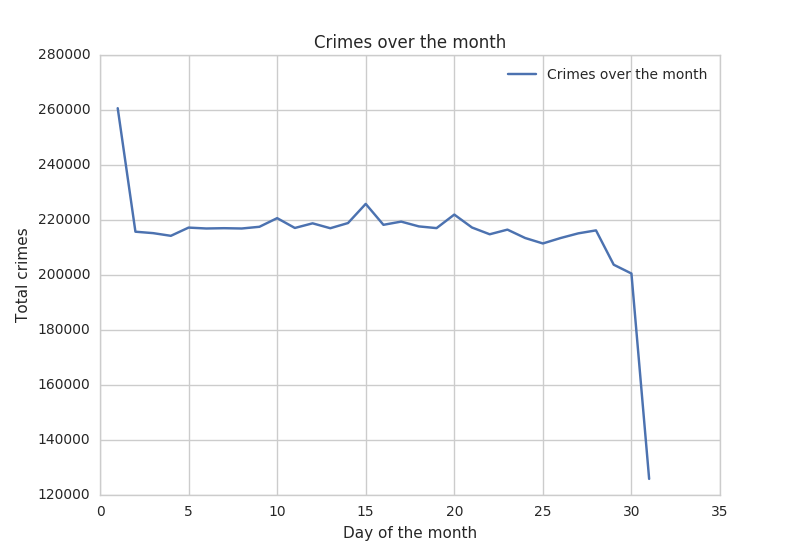

In [57]:
fg, ax = plt.subplots()

ax.plot(month_day_crime_counts_pddf['month_day'], month_day_crime_counts_pddf['count'], label='Crimes over the month')
ax.set(xlabel='Day of the month', ylabel='Total crimes',
       title='Crimes over the month')
ax.grid(b=True, which='both')
ax.legend()
display()

In [58]:
crimes_dates_community_areas = crimes_dates.na.drop(subset=['community_area']).groupBy('community_area').count()


In [59]:
#What are the to 10 areas with recorded crime
crimes_dates_community_areas.orderBy('count', ascending=False).show(10)


+--------------+------+
community_area| count|
+--------------+------+
 25|385529|
 8|204201|
 43|197057|
 23|191069|
 24|178677|
 67|178006|
 28|176865|
 29|173253|
 71|171039|
 68|161719|
+--------------+------+
only showing top 10 rows

In [60]:
## Is it possible to see how the top crime types occur in the top crime-affected areas?
top_crime_types = crimes_dates.select('primary_type').groupBy('primary_type').count().rdd.map(lambda row: row.asDict()).takeOrdered(10, key=lambda l: 1/l['count'])
top_busy_areas = crimes_dates_community_areas.rdd.map(lambda row: row.asDict()).takeOrdered(10, key=lambda l: 1/l['count'])

In [61]:
top_crime_types_lst = [dc['primary_type'] for dc in top_crime_types]
top_busy_areas_lst = [dc['community_area'] for dc in top_busy_areas]

In [62]:
top_crime_types_lst

Out[ 62 ]: 
[u'OFFENSE INVOLVING CHILDREN',
 u'STALKING',
 u'PUBLIC PEACE VIOLATION',
 u'OBSCENITY',
 u'NON-CRIMINAL (SUBJECT SPECIFIED)',
 u'ARSON',
 u'GAMBLING',
 u'CRIMINAL TRESPASS',
 u'ASSAULT',
 u'NON - CRIMINAL']

These are the top crime types occur in the top crime-affected areas.

In [64]:
top_busy_areas_lst

Out[ 63 ]: [u'51', u'7', u'54', u'15', u'11', u'69', u'29', u'42', u'73', u'64']

In [65]:
q1 = "instr('" + ' '.join(top_busy_areas_lst) + "', community_area) > 0"
q2 = "instr('" + ' '.join(top_crime_types_lst) + "', primary_type) > 0"
print(q1)

instr('51 7 54 15 11 69 29 42 73 64', community_area) > 0

In [66]:
## Construct a data frame filtered on these top community areas and top crime types:
crimes_dates_tops = crimes_dates.filter(q1).filter(q2)

In [67]:
crimes_dates_tops.count()

Out[ 66 ]: 131976

In [68]:
tops_of_tops = crimes_dates_tops.groupBy(['primary_type', 'community_area']).count().orderBy(['primary_type', 'count', 'community_area'], ascending=[True, False, True]).cache()

In [69]:
tops_of_tops.show(20)

+------------+--------------+-----+
primary_type|community_area|count|
+------------+--------------+-----+
 ARSON| 29| 303|
 ARSON| 69| 220|
 ARSON| 15| 147|
 ARSON| 42| 119|
 ARSON| 2| 100|
 ARSON| 73| 97|
 ARSON| 1| 88|
 ARSON| 6| 85|
 ARSON| 51| 78|
 ARSON| 3| 69|
 ARSON| 64| 49|
 ARSON| 7| 47|
 ARSON| 5| 45|
 ARSON| 54| 39|
 ARSON| 4| 38|
 ARSON| 11| 36|
 ARSON| 9| 12|
 ASSAULT| 69|11107|
 ASSAULT| 29|10849|
 ASSAULT| 42| 7253|
+------------+--------------+-----+
only showing top 20 rows

In [70]:
selected_features = [
 'location_description',
 'arrest',
 'domestic',
 'beat',
 'district',
 'ward',
 'community_area',
 'fbi_code',
 'hour',
 'week_day',
 'year_month',
 'month_day',
 'date_number']

In [71]:
#Let's see the schema of these selected features:
features_crimes = crimes_dates.select(selected_features)
features_crimes.printSchema()

root
-- location_description: string (nullable = true)
-- arrest: string (nullable = true)
-- domestic: string (nullable = true)
-- beat: string (nullable = true)
-- district: string (nullable = true)
-- ward: string (nullable = true)
-- community_area: string (nullable = true)
-- fbi_code: string (nullable = true)
-- hour: integer (nullable = true)
-- week_day: integer (nullable = true)
-- year_month: integer (nullable = true)
-- month_day: integer (nullable = true)
-- date_number: integer (nullable = true)

In [72]:
feature_level_count_dic = []

for feature in selected_features:
    print('Analysing %s' % feature)
    levels_list_crimes = features_crimes.select(feature).distinct()
    feature_level_count_dic.append({'feature': feature, 'level_count': levels_list_crimes.count()})

Analysing location_description
Analysing arrest
Analysing domestic
Analysing beat
Analysing district
Analysing ward
Analysing community_area
Analysing fbi_code
Analysing hour
Analysing week_day
Analysing year_month
Analysing month_day
Analysing date_number

In [73]:
pd.DataFrame(feature_level_count_dic).sort_values(by='level_count', ascending=False)

Out[ 72 ]: 
 feature level_count
12 date_number 6403
3 beat 304
0 location_description 180
6 community_area 79
5 ward 51
11 month_day 31
7 fbi_code 26
4 district 25
8 hour 24
10 year_month 12
9 week_day 7
1 arrest 2
2 domestic 2

In [74]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
crimes_dates_features = crimes_dates.na.drop(subset=selected_features)

In [75]:
#Let us use Spark's string indexer to index selected features
for feature in feature_level_count_dic:
    indexer = StringIndexer(inputCol=feature['feature'], outputCol='%s_indexed' % feature['feature'])
    print('Fitting feature "%s"' % feature['feature'])
    model = indexer.fit(crimes_dates_features)
    print('Transforming "%s"' % feature['feature'])
    crimes_dates_features = model.transform(crimes_dates_features)

Fitting feature "location_description"
Transforming "location_description"
Fitting feature "arrest"
Transforming "arrest"
Fitting feature "domestic"
Transforming "domestic"
Fitting feature "beat"
Transforming "beat"
Fitting feature "district"
Transforming "district"
Fitting feature "ward"
Transforming "ward"
Fitting feature "community_area"
Transforming "community_area"
Fitting feature "fbi_code"
Transforming "fbi_code"
Fitting feature "hour"
Transforming "hour"
Fitting feature "week_day"
Transforming "week_day"
Fitting feature "year_month"
Transforming "year_month"
Fitting feature "month_day"
Transforming "month_day"
Fitting feature "date_number"
Transforming "date_number"

In [76]:
## String-index the response variable:
response_indexer = StringIndexer(inputCol='primary_type', outputCol='primary_type_indexed')
response_model = response_indexer.fit(crimes_dates_features)
crimes_dates_features = response_model.transform(crimes_dates_features)

In [77]:
#new look
crimes_dates_features.show(1)

+--------+-----------+--------------------+---------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----------+----+--------+----------+---------+-----------+----------------------------+--------------+----------------+------------+----------------+------------+----------------------+----------------+------------+----------------+------------------+-----------------+-------------------+--------------------+
 id|case_number| date| block|iucr|primary_type| description|location_description|arrest|domestic|beat|district|ward|community_area|fbi_code|x_coordinate|y_coordinate|year| updated_on| latitude| longitude| location| date_time| month|hour|week_day|year_month|month_day|date_number|location_description_indexed|arrest_indexed|domestic_indexed|beat_indexed|district_indexed|ward_indexed|community_area_indexed|fbi_code_indexed|hour_indexed|week_day_indexed|year_month_indexed|month_day_indexed|date_number_indexed|primary_type_indexed|
+--------+-----------+--------------------+---------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----------+----+--------+----------+---------+-----------+----------------------------+--------------+----------------+------------+----------------+------------+----------------------+----------------+------------+----------------+------------------+-----------------+-------------------+--------------------+
10000092| HY189866|03/18/2015 07:44:...|047XX W OHIO ST|041A| BATTERY|AGGRAVATED: HANDGUN| STREET| false| false|1111| 011| 28| 25| 04B| 1144606| 1903566|2015|02/10/2018 03:50:...|41.891398861|-87.744384567|(41.891398861, -8...|2015-03-18 19:44:00|2015-01-01| 19| 4| 3| 18| 5189| 0.0| 0.0| 0.0| 54.0| 1.0| 0.0| 0.0| 10.0| 1.0| 1.0| 7.0| 8.0| 5399.0| 1.0|
+--------+-----------+--------------------+---------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----------+----+--------+----------+---------+-----------+----------------------------+--------------+----------------+------------+----------------+------------+----------------------+----------------+------------+----------------+------------------+-----------------+-------------------+--------------------+
only showing top 1 row

In [78]:
#We use a vector assembler to vectorize all predictors into a features column
indexed_features = ['%s_indexed' % fc['feature'] for fc in feature_level_count_dic]
indexed_features

Out[ 175 ]: 
['location_description_indexed',
 'arrest_indexed',
 'domestic_indexed',
 'beat_indexed',
 'district_indexed',
 'ward_indexed',
 'community_area_indexed',
 'fbi_code_indexed',
 'hour_indexed',
 'week_day_indexed',
 'year_month_indexed',
 'month_day_indexed',
 'date_number_indexed']

In [79]:
assembler = VectorAssembler(inputCols=indexed_features, outputCol='features')
vectorized_crimes_dates = assembler.transform(crimes_dates_features)

In [80]:
vectorized_crimes_dates.select('features').take(1)

Out[ 79 ]: [Row(features=DenseVector([0.0, 0.0, 0.0, 54.0, 1.0, 0.0, 0.0, 10.0, 1.0, 1.0, 7.0, 8.0, 5399.0]))]

In [81]:
#We're using 60% to 40% split between the train and the test datasets. logistic regression.
train, test = vectorized_crimes_dates.randomSplit([0.6, 0.4])


In [82]:
from pyspark.ml.classification import LogisticRegression

We will be using Logistic Regression

In [84]:
logisticRegression = LogisticRegression(labelCol='primary_type_indexed', featuresCol='features', maxIter=10, family='multinomial')

In [85]:
fittedModel = logisticRegression.fit(train)


In [86]:
fittedModel.summary.accuracy


Out[ 84 ]: 0.4937515268150169

In [88]:
model_summary = fittedModel.summary

In [89]:
fittedModel.coefficientMatrix


Out[ 86 ]: DenseMatrix(34, 13, [0.0223, -1.669, -2.3766, 0.0029, 0.0514, 0.0055, 0.0023, -1.3047, ..., 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0], 1)

In [90]:
#Why the 34X13 shape?
#That's because the multinomial logistic regression is fitted on each class of the label. It computes the probability of each class and then predicts based on these probabilities.
print(fittedModel.coefficientMatrix)

DenseMatrix([[ 2.23183227e-02, -1.66902857e+00, -2.37656629e+00,
 2.91208811e-03, 5.14437510e-02, 5.51967691e-03,
 2.27020003e-03, -1.30467076e+00, 4.79111715e-02,
 1.42914860e-01, 4.87054965e-02, 3.38628976e-02,
 1.82755113e-04],
 [ 1.89214702e-02, -2.80519281e-01, 2.66179829e+00,
 1.79335072e-03, 2.49145559e-02, 3.71712298e-04,
 2.34338433e-03, -3.75106861e-01, 3.08422149e-02,
 1.13285660e-01, 2.57513135e-02, 2.06165291e-02,
 -7.55257327e-06],
 [ -2.19312584e-03, -2.59868707e+00, 4.95215802e-01,
 9.82500883e-04, 8.35573451e-03, 1.50954213e-02,
 4.73905752e-03, -4.13317855e-01, 4.56392981e-02,
 1.43106530e-01, 4.10132210e-02, 2.72703486e-02,
 8.63333879e-05],
 [ -5.13322861e-02, 7.06444969e+00, -2.46468686e+00,
 -3.58567154e-03, -4.66332714e-02, -3.24280321e-02,
 -1.49979610e-02, -2.08112661e-01, -1.07635261e-01,
 -1.25127262e-01, -2.65471752e-02, -2.62143239e-02,
 -2.50656135e-04],
 [ -2.38481153e-02, -9.31874189e-01, 3.58862765e+00,
 1.70523085e-04, 1.44465017e-02, 1.16519713e-02,
 6.61610946e-03, -1.57755604e-01, 6.62690007e-03,
 2.51974262e-02, 1.89318918e-02, -5.84926091e-04,
 9.86244473e-06],
 [ 4.93395933e-03, -7.80742056e-01, 2.73715640e+00,
 -5.44388406e-04, -9.73628240e-03, -1.64707467e-03,
 3.10943508e-03, 2.14589528e-01, -1.35980544e-02,
 -2.42955769e-02, -3.80633007e-02, -4.35117080e-03,
 -1.56795812e-05],
 [ 1.30777280e-03, -2.22284977e+00, -1.51460650e+00,
 -1.69193840e-04, -1.14739945e-02, 2.04791522e-02,
 5.11880181e-03, 4.52751485e-02, 5.66015891e-02,
 -2.64076581e-02, 5.09936857e-03, 3.50407662e-03,
 1.84137147e-05],
 [ -5.62869798e-02, -1.72714471e+00, -1.31575727e+00,
 2.72527515e-04, -1.34635746e-02, 1.07485475e-02,
 4.27351962e-03, 2.08783326e-01, 5.57358846e-03,
 -9.07641743e-03, 7.93173804e-03, -3.27612239e-03,
 -3.35016962e-05],
 [ 3.91698010e-02, -1.38444547e+00, -1.11312406e+00,
 1.88902461e-04, 1.43241461e-02, -4.19124006e-03,
 -3.17203884e-03, 3.50445360e-01, -5.26251049e-02,
 -1.67899133e-01, -5.10048236e-02, -3.51431787e-02,
 7.80260227e-05],
 [ -8.64081316e-04, -1.49729272e+00, -9.15867029e-01,
 -8.73631244e-04, -1.60935187e-02, -6.55382890e-03,
 -4.56026872e-03, 2.57427990e-01, 9.55166194e-03,
 -4.90118506e-03, -1.37281890e-02, -3.58170745e-03,
 -4.43308018e-07],
 [ 5.09859881e-02, 2.00418884e+00, -4.76956177e-01,
 8.05360365e-04, 1.77862911e-02, -1.40956366e-02,
 -6.05137673e-04, -1.20921182e-01, -1.57302852e-02,
 -3.13258027e-02, -2.67199532e-03, -5.63767163e-03,
 -6.97015636e-05],
 [ -6.07850996e-03, 1.09599457e+00, -3.38124256e-01,
 -1.70892504e-03, -2.17628899e-02, -8.53046770e-03,
 -4.33621668e-03, 2.09047318e-01, -1.67925061e-02,
 -2.74945148e-02, -1.80264414e-02, -5.15342720e-03,
 1.70266475e-05],
 [ -1.96273799e-02, 1.46896361e+00, -3.32058914e-01,
 -7.87627401e-04, -2.44041936e-02, -1.02722417e-02,
 -8.00559344e-03, 2.22923173e-01, -1.20462113e-03,
 -7.24547431e-02, -7.41287178e-03, -5.68616925e-03,
 -1.27639155e-04],
 [ 7.13695691e-04, 6.15134492e-01, -9.90745050e-02,
 -1.18187263e-04, -3.60489190e-04, 2.55006267e-03,
 5.60836527e-04, 1.44025024e-01, -9.89626663e-03,
 -9.67524149e-03, -9.15733362e-03, -1.09145915e-03,
 1.25688276e-05],
 [ -5.36086421e-03, -1.67906374e-01, 1.38622526e+00,
 -2.55331633e-04, -2.65598069e-03, 2.84797791e-03,
 2.38133362e-03, 1.75165269e-01, -9.04310304e-03,
 1.18181927e-03, 8.29330053e-03, -5.00361009e-03,
 1.80639450e-05],
 [ 1.02312919e-03, -1.44527729e-01, 1.13997548e-01,
 6.18520278e-05, 6.03710455e-04, 3.68073845e-04,
 4.37482715e-05, 1.44247978e-01, 9.10047124e-03,
 1.67238846e-02, 1.64574859e-03, -1.36939387e-03,
 2.12183075e-05],
 [ 3.19016091e-03, 2.52107287e-03, 1.57371444e-02,
 3.86189990e-04, 4.64721981e-03, 3.53923820e-03,
 1.74048490e-03, 1.41808555e-01, 2.29810290e-03,
 2.63013381e-03, -1.45241118e-03, -1.80455542e-03,
 -7.91822513e-06],
 [ -3.59048027e-04, 3.92592250e-01, -7.16956623e-02,
 -1.10236757e-04, -4.36101474e-04, -7.42237591e-04,
 -4.79052239e-04, 6.91434486e-02, 9.39425567e-04,
 1.25379959e-02, 4.17264962e-03, 2.67274439e-03,

In [91]:
print('Coefficient matrix:\nRow count = %s\nCol count = %s' % (fittedModel.coefficientMatrix.numRows, fittedModel.coefficientMatrix.numCols))

Coefficient matrix:
Row count = 34
Col count = 13

In [92]:
print('Model:\nNum Classes = %s\nNum Features = %s' % (fittedModel.numClasses, fittedModel.numFeatures))


Model:
Num Classes = 34
Num Features = 13

In [93]:
print('Training "primary_type" factor level count = %s' % train.select('primary_type_indexed').distinct().count())

Training "primary_type" factor level count = 34

In [94]:
vectorized_crimes_dates.select('features').show(2, truncate=False)


+-----------------------------------------------------------+
features |
+-----------------------------------------------------------+
[0.0,0.0,0.0,54.0,1.0,0.0,0.0,10.0,1.0,1.0,7.0,8.0,5399.0] |
[0.0,1.0,0.0,42.0,2.0,12.0,5.0,3.0,12.0,1.0,7.0,8.0,5399.0]|
+-----------------------------------------------------------+
only showing top 2 rows

In [95]:
fittedModel.numClasses

Out[ 92 ]: 34

In [96]:
fittedModel.numFeatures

Out[ 93 ]: 13

In [97]:
train.select('primary_type_indexed').distinct().count()


Out[ 94 ]: 34

In [98]:
crimes_dates.select('primary_type').distinct().count()


Out[ 95 ]: 35

In [99]:
fittedModel.interceptVector.values.size


Out[ 96 ]: 34

In [100]:
print(model_summary.objectiveHistory)
print()
print('Objective history size ', len(model_summary.objectiveHistory))

[2.4103915154204794, 2.1104181981522965, 2.010006480316253, 1.877372279351891, 1.8074950562325451, 1.763433534131579, 1.713075162985928, 1.6646079219372776, 1.6212914966141787, 1.5997481363039516, 1.5788555683857621]
()
('Objective history size ', 11)

In [101]:
plt.clf()
sns.barplot(y=model_summary.objectiveHistory, x=list(range(len(model_summary.objectiveHistory))))
sns.plt.show()
#display()

In [102]:
label_stats = {float(i):{'index': float(i)} for i in range(34)}
print(label_stats)

{0.0: {'index': 0.0}, 1.0: {'index': 1.0}, 2.0: {'index': 2.0}, 3.0: {'index': 3.0}, 4.0: {'index': 4.0}, 5.0: {'index': 5.0}, 6.0: {'index': 6.0}, 7.0: {'index': 7.0}, 8.0: {'index': 8.0}, 9.0: {'index': 9.0}, 10.0: {'index': 10.0}, 11.0: {'index': 11.0}, 12.0: {'index': 12.0}, 13.0: {'index': 13.0}, 14.0: {'index': 14.0}, 15.0: {'index': 15.0}, 16.0: {'index': 16.0}, 17.0: {'index': 17.0}, 18.0: {'index': 18.0}, 19.0: {'index': 19.0}, 20.0: {'index': 20.0}, 21.0: {'index': 21.0}, 22.0: {'index': 22.0}, 23.0: {'index': 23.0}, 24.0: {'index': 24.0}, 25.0: {'index': 25.0}, 26.0: {'index': 26.0}, 27.0: {'index': 27.0}, 28.0: {'index': 28.0}, 29.0: {'index': 29.0}, 30.0: {'index': 30.0}, 31.0: {'index': 31.0}, 32.0: {'index': 32.0}, 33.0: {'index': 33.0}}

In [103]:
print("False positive rate by label:")
for i, rate in enumerate(model_summary.falsePositiveRateByLabel):
    label_stats[i]['false_positive_rate'] = rate
    
for i, rate in enumerate(model_summary.truePositiveRateByLabel):
    label_stats[i]['true_positive_rate'] = rate
    
for i, rate in enumerate(model_summary.precisionByLabel):
    label_stats[i]['precision_rate'] = rate
    
for i, rate in enumerate(model_summary.recallByLabel):
    label_stats[i]['recall_rate'] = rate
    
for i, rate in enumerate(model_summary.fMeasureByLabel()):
    label_stats[i]['f_measure'] = rate

False positive rate by label:

In [104]:
train_rdd = train.select(['primary_type', 'primary_type_indexed']).distinct().orderBy('primary_type_indexed').rdd.map(lambda l: l.asDict()).collect()

In [105]:
for l in train_rdd:
    print(l)
    label_stats[l['primary_type_indexed']]['primary_type'] = l['primary_type']

{'primary_type': u'THEFT', 'primary_type_indexed': 0.0}
{'primary_type': u'BATTERY', 'primary_type_indexed': 1.0}
{'primary_type': u'CRIMINAL DAMAGE', 'primary_type_indexed': 2.0}
{'primary_type': u'NARCOTICS', 'primary_type_indexed': 3.0}
{'primary_type': u'OTHER OFFENSE', 'primary_type_indexed': 4.0}
{'primary_type': u'ASSAULT', 'primary_type_indexed': 5.0}
{'primary_type': u'BURGLARY', 'primary_type_indexed': 6.0}
{'primary_type': u'MOTOR VEHICLE THEFT', 'primary_type_indexed': 7.0}
{'primary_type': u'DECEPTIVE PRACTICE', 'primary_type_indexed': 8.0}
{'primary_type': u'ROBBERY', 'primary_type_indexed': 9.0}
{'primary_type': u'CRIMINAL TRESPASS', 'primary_type_indexed': 10.0}
{'primary_type': u'WEAPONS VIOLATION', 'primary_type_indexed': 11.0}
{'primary_type': u'PROSTITUTION', 'primary_type_indexed': 12.0}
{'primary_type': u'PUBLIC PEACE VIOLATION', 'primary_type_indexed': 13.0}
{'primary_type': u'OFFENSE INVOLVING CHILDREN', 'primary_type_indexed': 14.0}
{'primary_type': u'CRIM SEXUAL ASSAULT', 'primary_type_indexed': 15.0}
{'primary_type': u'SEX OFFENSE', 'primary_type_indexed': 16.0}
{'primary_type': u'INTERFERENCE WITH PUBLIC OFFICER', 'primary_type_indexed': 17.0}
{'primary_type': u'GAMBLING', 'primary_type_indexed': 18.0}
{'primary_type': u'LIQUOR LAW VIOLATION', 'primary_type_indexed': 19.0}
{'primary_type': u'ARSON', 'primary_type_indexed': 20.0}
{'primary_type': u'HOMICIDE', 'primary_type_indexed': 21.0}
{'primary_type': u'KIDNAPPING', 'primary_type_indexed': 22.0}
{'primary_type': u'INTIMIDATION', 'primary_type_indexed': 23.0}
{'primary_type': u'STALKING', 'primary_type_indexed': 24.0}
{'primary_type': u'OBSCENITY', 'primary_type_indexed': 25.0}
{'primary_type': u'CONCEALED CARRY LICENSE VIOLATION', 'primary_type_indexed': 26.0}
{'primary_type': u'NON-CRIMINAL', 'primary_type_indexed': 27.0}
{'primary_type': u'PUBLIC INDECENCY', 'primary_type_indexed': 28.0}
{'primary_type': u'OTHER NARCOTIC VIOLATION', 'primary_type_indexed': 29.0}
{'primary_type': u'HUMAN TRAFFICKING', 'primary_type_indexed': 30.0}
{'primary_type': u'NON - CRIMINAL', 'primary_type_indexed': 31.0}
{'primary_type': u'RITUALISM', 'primary_type_indexed': 32.0}
{'primary_type': u'NON-CRIMINAL (SUBJECT SPECIFIED)', 'primary_type_indexed': 33.0}

In [106]:
rates_pddf = pd.DataFrame(list(label_stats.values()))


In [107]:
rates_pddf = rates_pddf.sort_values(by='precision_rate', ascending=False)


In [108]:
rates_pddf


Out[ 104 ]: 
 f_measure false_positive_rate index precision_rate \
0 0.778505 0.124175 0.0 0.667411 
3 0.680638 0.073799 3.0 0.573208 
12 0.404745 0.003003 12.0 0.524632 
2 0.448629 0.050352 2.0 0.507468 
1 0.419730 0.135552 1.0 0.412015 
4 0.058950 0.003258 4.0 0.391751 
7 0.363513 0.033354 7.0 0.352648 
6 0.383306 0.057493 6.0 0.329712 
11 0.066091 0.000824 11.0 0.321691 
5 0.238857 0.029294 5.0 0.305359 
8 0.326062 0.045258 8.0 0.269596 
10 0.131464 0.008158 10.0 0.245679 
9 0.154157 0.015597 9.0 0.227719 
23 0.000000 0.000000 23.0 0.000000 
32 0.000000 0.000000 32.0 0.000000 
31 0.000000 0.000000 31.0 0.000000 
30 0.000000 0.000000 30.0 0.000000 
29 0.000000 0.000000 29.0 0.000000 
28 0.000000 0.000000 28.0 0.000000 
27 0.000000 0.000000 27.0 0.000000 
26 0.000000 0.000000 26.0 0.000000 
25 0.000000 0.000000 25.0 0.000000 
24 0.000000 0.000000 24.0 0.000000 
17 0.000000 0.000000 17.0 0.000000 
22 0.000000 0.000000 22.0 0.000000 
21 0.000000 0.000000 21.0 0.000000 
20 0.000000 0.000000 20.0 0.000000 
19 0.000000 0.000000 19.0 0.000000 
18 0.000000 0.000000 18.0 0.000000 
16 0.000000 0.000000 16.0 0.000000 
15 0.000000 0.000000 15.0 0.000000 
14 0.000000 0.000000 14.0 0.000000 
13 0.000000 0.000000 13.0 0.000000 
33 0.000000 0.000000 33.0 0.000000 

 primary_type recall_rate true_positive_rate 
0 THEFT 0.933968 0.933968 
3 NARCOTICS 0.837626 0.837626 
12 PROSTITUTION 0.329458 0.329458 
2 CRIMINAL DAMAGE 0.402017 0.402017 
1 BATTERY 0.427739 0.427739 
4 OTHER OFFENSE 0.031873 0.031873 
7 MOTOR VEHICLE THEFT 0.375068 0.375068 
6 BURGLARY 0.457704 0.457704 
11 WEAPONS VIOLATION 0.036829 0.036829 
5 ASSAULT 0.196142 0.196142 
8 DECEPTIVE PRACTICE 0.412450 0.412450 
10 CRIMINAL TRESPASS 0.089743 0.089743 
9 ROBBERY 0.116518 0.116518 
23 INTIMIDATION 0.000000 0.000000 
32 RITUALISM 0.000000 0.000000 
31 NON - CRIMINAL 0.000000 0.000000 
30 HUMAN TRAFFICKING 0.000000 0.000000 
29 OTHER NARCOTIC VIOLATION 0.000000 0.000000 
28 PUBLIC INDECENCY 0.000000 0.000000 
27 NON-CRIMINAL 0.000000 0.000000 
26 CONCEALED CARRY LICENSE VIOLATION 0.000000 0.000000 
25 OBSCENITY 0.000000 0.000000 
24 STALKING 0.000000 0.000000 
17 INTERFERENCE WITH PUBLIC OFFICER 0.000000 0.000000 
22 KIDNAPPING 0.000000 0.000000 
21 HOMICIDE 0.000000 0.000000 
20 ARSON 0.000000 0.000000 
19 LIQUOR LAW VIOLATION 0.000000 0.000000 
18 GAMBLING 0.000000 0.000000 
16 SEX OFFENSE 0.000000 0.000000 
15 CRIM SEXUAL ASSAULT 0.000000 0.000000 
14 OFFENSE INVOLVING CHILDREN 0.000000 0.000000 
13 PUBLIC PEACE VIOLATION 0.000000 0.000000 
33 NON-CRIMINAL (SUBJECT SPECIFIED) 0.000000 0.000000

According to our Logistic Regression Analysis analysis the highest crime rate is for Theft which is 93.3%